In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('conjunto-dados.csv', delimiter=';')

df.shape
df.head()

,Organização,Nome,Descrição,Tags,Quantidade Recursos,Quantidade Reusos,Quantidade Downloads,Quantidade Seguidores
0,Universidade Federal de Ouro Preto - UFOP,Serviços de Atendimento,Relação de projetos de TI geridos pelo Núcleo ...,"Gestão,Projeto,Tecnologia da Informação",2,0,29,0
1,Universidade Federal de Ouro Preto - UFOP,Servidores,Servidores ativos do quadro efetivo da UFOP,"Gestão de Pessoas,Servidor",2,0,7,0
2,Universidade Federal de Ouro Preto - UFOP,Projetos de Pesquisa,Conjunto de dados referente aos projetos de pe...,"pesquisa,projetos",2,0,6,0
3,Universidade Federal de Ouro Preto - UFOP,Quantitativos de matriculados 2019-1,Quantitativo de estudantes matriculados no sem...,"2019-1,Alunos Matriculados,graduação",2,0,8,0
4,Universidade Federal de Ouro Preto - UFOP,Quantitativos de matriculados 2018-1,Quantitativo de estudantes matriculados no sem...,"2018-1,Alunos Matriculados,graduação",2,0,5,0


In [14]:
df.columns

Index(['Organização', 'Nome', 'Descrição', 'Tags', 'Quantidade Recursos',
       'Quantidade Reusos', 'Quantidade Downloads', 'Quantidade Seguidores'],
      dtype='object')

In [15]:
df.isnull().sum()

Organização               0
Nome                      0
Descrição                 0
Tags                     11
Quantidade Recursos       0
Quantidade Reusos         0
Quantidade Downloads      0
Quantidade Seguidores     0
dtype: int64

In [22]:
# Preencher valores nulos na coluna 'Tags' com zero
df['Tags'].fillna(0, inplace=True)

# Substituir valores não numéricos na coluna 'Tags' por zero
df['Tags'] = pd.to_numeric(df['Tags'], errors='coerce').fillna(0).astype(int)

df.isnull().sum()

Organização              0
Nome                     0
Descrição                0
Tags                     0
Quantidade Recursos      0
Quantidade Reusos        0
Quantidade Downloads     0
Quantidade Seguidores    0
dtype: int64

In [23]:
df.head()

,Organização,Nome,Descrição,Tags,Quantidade Recursos,Quantidade Reusos,Quantidade Downloads,Quantidade Seguidores
0,Universidade Federal de Ouro Preto - UFOP,Serviços de Atendimento,Relação de projetos de TI geridos pelo Núcleo ...,0,2,0,29,0
1,Universidade Federal de Ouro Preto - UFOP,Servidores,Servidores ativos do quadro efetivo da UFOP,0,2,0,7,0
2,Universidade Federal de Ouro Preto - UFOP,Projetos de Pesquisa,Conjunto de dados referente aos projetos de pe...,0,2,0,6,0
3,Universidade Federal de Ouro Preto - UFOP,Quantitativos de matriculados 2019-1,Quantitativo de estudantes matriculados no sem...,0,2,0,8,0
4,Universidade Federal de Ouro Preto - UFOP,Quantitativos de matriculados 2018-1,Quantitativo de estudantes matriculados no sem...,0,2,0,5,0


In [29]:
#visualização de dados a partir de agora
#comecemos com quantidade de downloads

qtd_downloads = df['Quantidade Downloads'].sum()
qtd_downloads

586

In [30]:
#quantidade recursos
qtd_rec = df['Quantidade Recursos'].sum()
qtd_rec

353

In [31]:
#qtd reusos
qtd_reu = df['Quantidade Reusos'].sum()
qtd_reu

0

In [32]:
#qtd seguidores
qtd_seg = df['Quantidade Seguidores'].sum()
qtd_seg

0

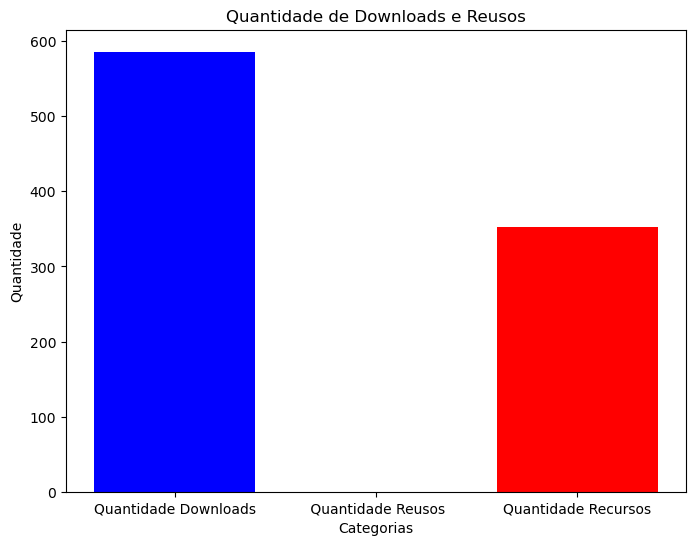

In [37]:
#montar graficos

# Criar dados para o gráfico
cat = ['Quantidade Downloads', ' Quantidade Reusos', 'Quantidade Recursos']
quant = [qtd_downloads, qtd_reu, qtd_rec]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(cat, quant, color=['blue', 'green', 'red'])
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Quantidade de Downloads e Reusos')
plt.show()


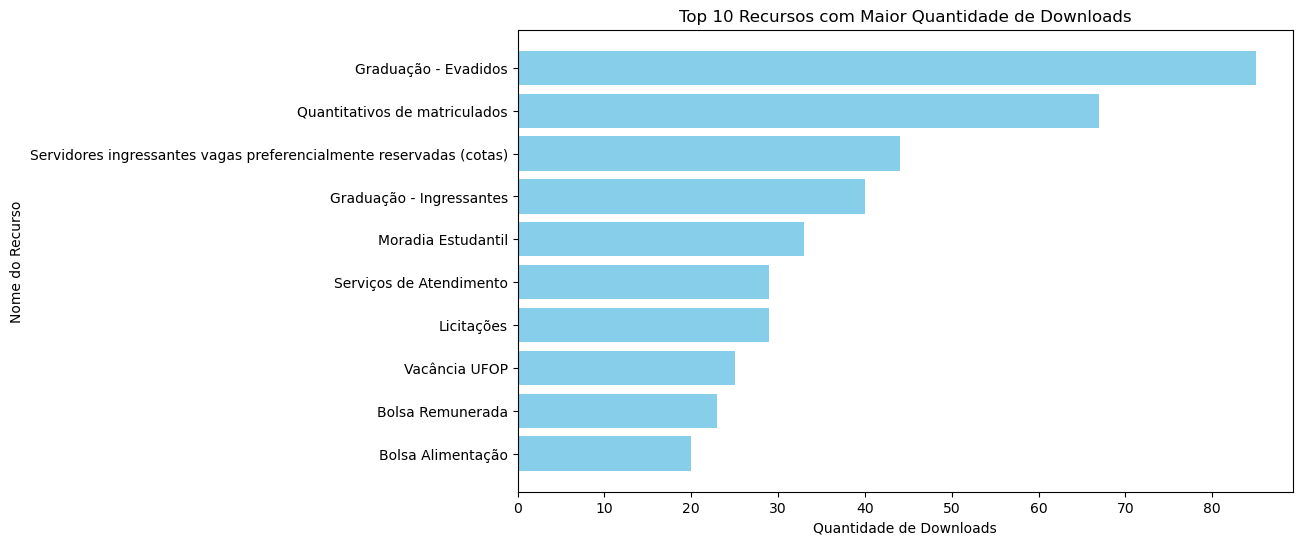

In [38]:
# Ordenar o DataFrame pelos maiores downloads
top_downloads = df.sort_values(by='Quantidade Downloads', ascending=False).head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_downloads['Nome'], top_downloads['Quantidade Downloads'], color='skyblue')
plt.xlabel('Quantidade de Downloads')
plt.ylabel('Nome do Recurso')
plt.title('Top 10 Recursos com Maior Quantidade de Downloads')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a entrada com o maior download no topo
plt.show()


In [40]:
df['Quantidade Downloads'].describe()

count    60.000000
mean      9.766667
std      16.229672
min       0.000000
25%       0.000000
50%       4.000000
75%       8.500000
max      85.000000
Name: Quantidade Downloads, dtype: float64

In [41]:
#média de downloads: 9,76

In [42]:
df.to_csv('conjunto-dados-tratados.csv', index=False)